In [9]:
# # 訓練期間とテスト期間を日付で指定

## 2022年-豪雨
# train_start_date    = '2016-01-01 00:00:00'
# train_end_date      = '2022-09-14 23:59:59'
# test_start_date     = '2022-09-15 00:00:00'
# test_end_date       = '2022-09-21 23:59:59'


## 2021年-豪雨
# train_start_date    = '2016-01-01 00:00:00'
# train_end_date      = '2021-08-09 23:59:59'
# test_start_date     = '2021-08-10 00:00:00'
# test_end_date       = '2021-08-16 23:59:59'


## 2018年-豪雨
train_start_date    = '2016-01-01 00:00:00'
train_end_date      = '2018-06-30 23:59:59'
test_start_date     = '2018-07-01 00:00:00'
test_end_date       = '2018-07-11 23:59:59'

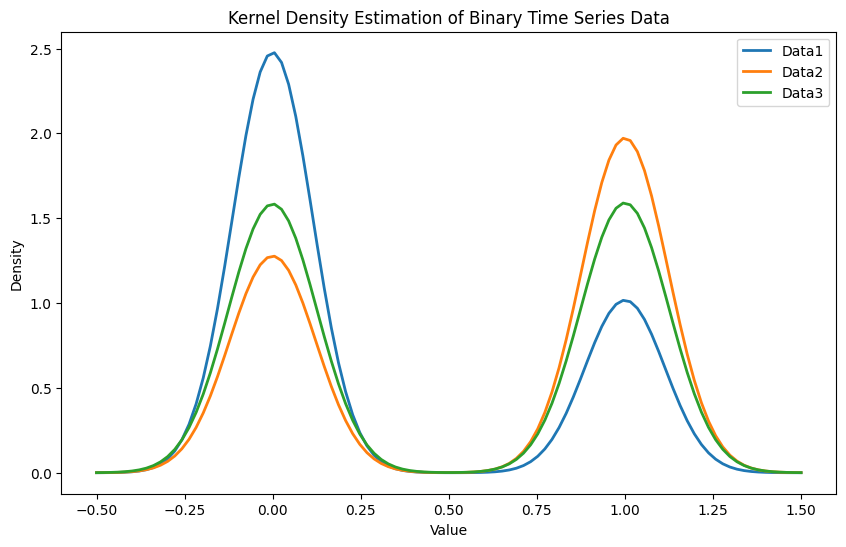

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# サンプルデータの生成
np.random.seed(0)
data1 = np.random.choice([0, 1], size=1000, p=[0.7, 0.3])
data2 = np.random.choice([0, 1], size=1000, p=[0.4, 0.6])
data3 = np.random.choice([0, 1], size=1000, p=[0.5, 0.5])

# データフレームの作成
df = pd.DataFrame({
    'Data1': data1,
    'Data2': data2,
    'Data3': data3
})

# KDEの計算
x = np.linspace(-0.5, 1.5, 100)  # KDEを評価するためのx座標
kde_data1 = gaussian_kde(df['Data1'])
kde_data2 = gaussian_kde(df['Data2'])
kde_data3 = gaussian_kde(df['Data3'])

# KDEの値を変数に格納
density1 = kde_data1(x)
density2 = kde_data2(x)
density3 = kde_data3(x)

# プロット
plt.figure(figsize=(10, 6))
plt.plot(x, density1, label='Data1', lw=2)
plt.plot(x, density2, label='Data2', lw=2)
plt.plot(x, density3, label='Data3', lw=2)

plt.title('Kernel Density Estimation of Binary Time Series Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [10]:
import pickle

# 日本語フォントを可能にするアイテム
from matplotlib import rcParams
rcParams['font.family'] = 'Noto Sans CJK JP'

# pickleで保存したファイルを読み込み
pickle_path = '../html/kurashiki/output/warning_list.pickle'
with open(pickle_path, mode='rb') as fi:
    data = pickle.load(fi)

df_warnings_tmp = data['combined_df']

# データを指定した期間でフィルタリング
df_warnings = df_warnings_tmp.loc[train_start_date:test_end_date]

timeLine=df_warnings.index
df_warnings

,雷注意報,大雨注意報,洪水注意報,強風注意報,大雨警報,洪水警報,暴風警報,大雨特別警報
time,,,,,,,,
2016-01-01 00:00:00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 01:00:00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 02:00:00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 03:00:00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 04:00:00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2018-07-11 19:00:00,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-07-11 20:00:00,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-07-11 21:00:00,0.216667,0.0,0.0,0.0,0.0,1.0,0.0,0.0


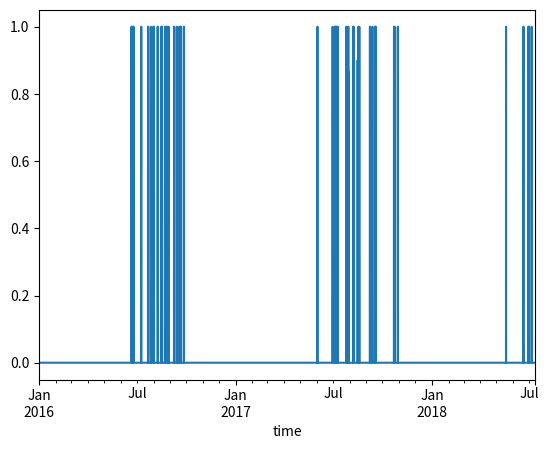

In [17]:
df_warnings['洪水注意報'].plot()



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


kde_data1 = gaussian_kde(df_warnings['洪水注意報'].dropna())  # NaN値を削除

x=np.linspace(0,1,len(df_warnings))
kde_values = kde_data1(x)

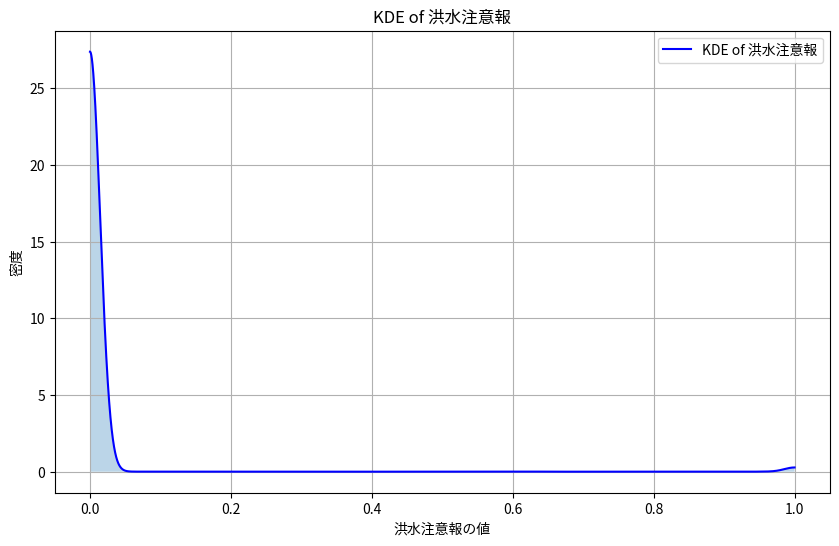

In [23]:
# グラフを描画します。
plt.figure(figsize=(10, 6))
plt.plot(x, kde_values, label='KDE of 洪水注意報', color='blue')
plt.fill_between(x, kde_values, alpha=0.3)
plt.title('KDE of 洪水注意報')
plt.xlabel('洪水注意報の値')
plt.ylabel('密度')
plt.legend()
plt.grid()